## Perceptron ##


Logic Gates

In [ ]:
def adjustWeight(w,x,lr,y_pred,y):
    w += lr*(y-y_pred)*x
    return w

def stepFunction(netsum):
    return 1 if netsum >= 1 else 0

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_weight(w1list, w2list, blist):
    w1 = np.array(w1list)
    w2 = np.array(w2list)
    b = np.array(blist)
    steps = np.arange(1, len(w1) + 1)
    plt.figure(figsize=(10, 6))
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.plot(steps, w1, label="Weight 1", color='royalblue', marker='o', markersize=6, linewidth=2)
    plt.plot(steps, w2, label="Weight 2", color='forestgreen', marker='s', markersize=6, linewidth=2)
    plt.plot(steps, b, label="Bias", color='crimson', marker='^', markersize=6, linewidth=2)
    plt.xlabel("Number of Steps", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.title(f"Perceptron Learning Graph of {gate_name} Gate", fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [10]:
def calculateWeight(w1, w2, b,x,lr):
    valid = 0
    i = 0
    n = 0
    w1list = list()
    w2list = list()
    blist = list()
    while(i<=3):
        n = n + 1
        if n>=1000:
            plot_weight(w1list,w2list,blist)
            return w1, w2 ,0
        
        x1 = x[0][i]
        x2 = x[1][i]
        y = x[2][i]
        netsum = w1*x1 + w2*x2+b

        y_pred = stepFunction(netsum)
        
        if y_pred == y:
            i = i + 1
            w1list.append(w1)
            w2list.append(w2)
            blist.append(b)
            continue
        else:
            w1= adjustWeight(w1,x1,lr,y_pred,y)
            w2= adjustWeight(w2,x2,lr,y_pred,y)
            if(b!=0):
                b += lr * (y-y_pred)
            w1list.append(w1)
            w2list.append(w2)
            blist.append(b)
            i = -1
    valid = 1
    print(f"n = {n}")
    plot_weight(w1list,w2list,blist)
    return w1, w2, valid

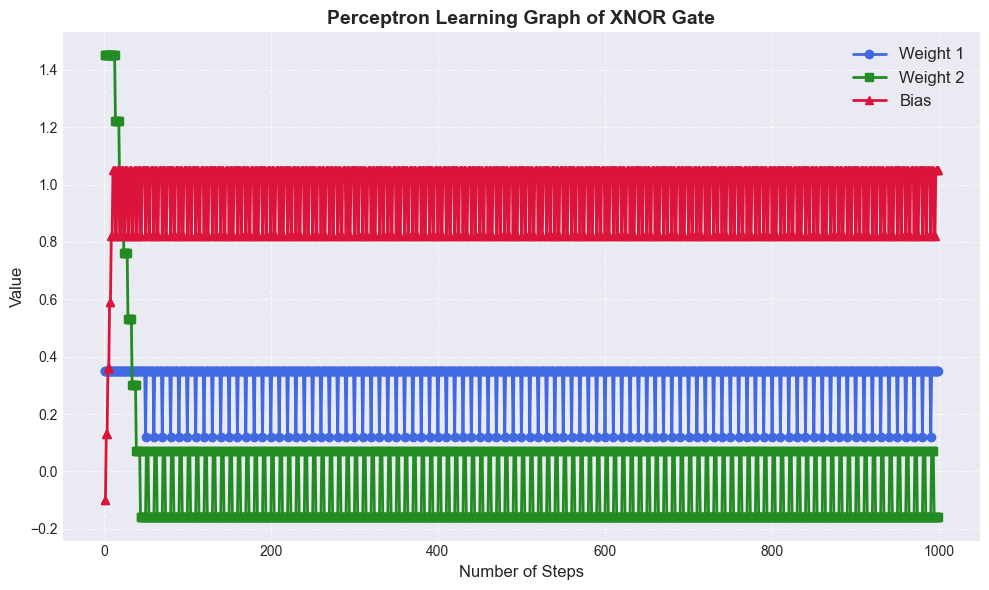


Perceptron can't compute the XNOR gate with these settings.


In [14]:
weight1 = 0.35 #float(input("Enter weight 1: "))
weight2 = 1.45 #float(input("Enter weight 2: "))
bias = -0.33 #float(input("Enter the bias: "))
learning_rate = 0.23 #float(input("Enter the learning rate: "))
opt = int(input("Enter 1 - AND, 2 - OR, 3- XOR, 4 - XNOR: "))
match(opt):
    case 1:
        gate_name = "AND"
        train_info = [[0,0,1,1],
                      [0,1,0,1],
                      [0,0,0,1]]
    case 2:
        gate_name = "OR"
        train_info = [[0,0,1,1],
                      [0,1,0,1],
                      [0,1,1,1]]
    case 3:
        gate_name = "XOR"
        train_info = [[0,0,1,1],
                      [0,1,0,1],
                      [0,1,1,0]]
    case 4:
        gate_name = "XNOR"
        train_info = [[0,0,1,1],
                      [0,1,0,1],
                      [1,0,0,1]]



weight1, weight2, valid = calculateWeight(weight1,weight2,bias,train_info,learning_rate)

if valid:
        print(f"\nSuccess! Perceptron learned the {gate_name} gate.")
        print(f"Final Weights: Weight 1 = {weight1}, Weight 2 = {weight2:}")
else:
    print(f"\nPerceptron can't compute the {gate_name} gate with these settings.")
    